# Keras Tools for Convolutional Neural Network (CNN)

#### Dr. Mohamed Marzouk Sobaih, Postdoctoral Researcher
#### [Twitter](https://twitter.com/mohamedmarzouk2) | [GitHub](https://github.com/momarzouksobeh) | [GoogleScholar](https://scholar.google.com/citations?hl=en&user=OWIaK9sAAAAJ) | [Website](https://momarzouksobeh.github.io) | [LinkedIn](http://www.linkedin.com/in/momarzouksobeh/)

# Table of Content 
- [1 - Introduction ](#intro)
    - [1.1 What is the new we will learn in this example ? ](#tutorial_imp)
    - [1.2 Load the required libraries ](#import)
    - [1.4 What is the version of Keras used in this tutorial? ](#tf_version)
- [2 - Data preparation ](#preparation)
    - [2.1 Load data ](#load_data)
    - [2.2 Split data for training and test set ](#split)
    - [2.3 Data Normalization](#normalization)
    - [2.4 Data Augmentation ](#augmentation)

- [3- Build CNN model ](#CNN_model)
    - [3.7 Define our CNN model by Keras ](#define_model)
    - [3.8 Information about the defined model ](#model_info)
    - [3.9 Compile our Model ](#model_compile)
- [4- Train & Evaluate the model](#train_evaluate)
    - [4.1 Train (Fit) our CNN Model ](#train_model)
    - [4.2 The history of model learning on training data ](#model_history)
    - [4.3 Evaluate our CNN Model ](#evaluate_model)
- [5- Prediction ](#prediction)
    - [5.1 Make Predictions using our trained model ](#make_prediction)
    - [5.2 Visualize correct and incorrect predictions ](#correct_incorrect)
-  [6- Model Saving ](#saving)
    - [6.1 Save the entire model ](#model_saving)
    - [6.2 Save the layers weights ](#weights_saving)
    - [6.3 Reload the weights again in a new model ](#reload_weights)
-  [ Further TensorFlow (Keras) Applications for CNN ](#other_apps)
-  [ Key Resources Utilized in Crafting This Notebook](#resources)


<a name="intro"></a>
## 1 - Introduction

<a name="tutorial_imp"></a>
### 1.1 What is the new we will learn in this example ?

* In this tutorial, we will build a Convolutional Neural Network (CNN) model for classifying images of cats and dogs. We will compare its performance to a previously constructed Deep Neural Network (DNN) model on the same dataset, the Kaggle "Cats and Dogs" dataset. This popular dataset is often used in computer vision tasks, particularly for image classification.

* While DNNs are generally powerful models, CNNs are often preferred for image-related tasks due to their ability to extract features from images more effectively. This tutorial aims to assess whether using a CNN can indeed handle image data better than the DNN for this specific task.

* By comparing the performance of both models, we can gain valuable insights into the effectiveness of CNNs for image classification tasks.

 * For a more in-depth look at the previous tutorial, please follow this [link](https://github.com/momarzouksobeh/MachineLearning_for_DrugDesign_Roadmap/blob/main/1_ML_Toolkit/keras/DNN_case_studies/Keras_CaseStudy_no5.ipynb).



<a name="import"></a>
### 1.2 Load the required libraries

In [1]:
import tensorflow as tf
import keras ,  cv2 , os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import seaborn as sns 
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

<a name="tf_version"></a>
### 1.3 What is the version of Keras used in this tutorial ?
- **Keras** can be accessed either as a dependent module within **TensorFlow** or independently as a standalone framework. 
> For this notebook, we are utilizing **TensorFlow** and **Keras**, with versions '2.14.0', and '2.12.0' respectively. 

In [2]:
print("The version of tensorflow is : ", tf.__version__)
print("The version of keras is : ", keras.__version__)

The version of tensorflow is :  2.14.0
The version of keras is :  2.12.0


<a name="preparation"></a>
## 2 - Data preparation 

<a name="load_data"></a>
### 2.1 Load Data
- <a rel="cats_dogs_datasets" href="https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765"> Click here for the original Dataset</a> : it is better to download by yourself. 

#### A) Let's start with 10 images only and check  

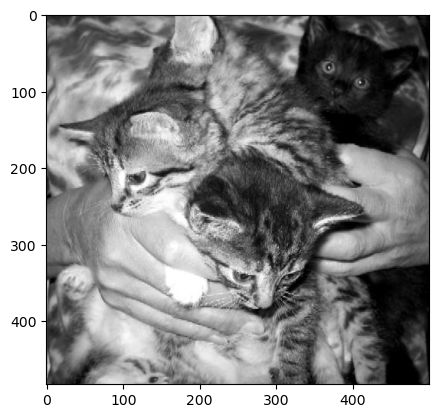

In [41]:
DATADIR = '../DNN_case_studies/PetImages'
CATEGORIES = ["Dog", "Cat"]
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    x=0
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        x+=1
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        # plt.show()  # display!
        if x==11 : 
            break    

> Let's see the last image array 

In [113]:
print(img_array) 
print(img_array.shape)

[[ 72  65  60 ...  81  83  92]
 [ 66  58  54 ...  78  78  87]
 [ 62  54  50 ...  78  76  84]
 ...
 [125 113 114 ...  95 101 105]
 [126 114 117 ... 100 107 113]
 [128 118 122 ... 105 113 120]]
(500, 448)


> Let's try different sizes for images to decide which one will be better. 

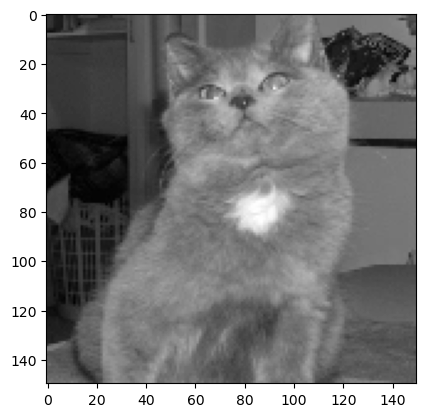

In [6]:
#IMG_SIZE = 5
# IMG_SIZE = 50
IMG_SIZE = 150

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

#### B) Applying all the processing with the decided size for all images 

In [7]:
all_data = []

def create_all_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                all_data.append([new_array, class_num])  # add this to our data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
           
create_all_data()


  0%|          | 0/12501 [00:00<?, ?it/s]

100%|██████████| 12501/12501 [00:08<00:00, 1432.78it/s]


> Let's see the variation of cats and dogs in our dataset 

In [8]:
Dogs = 0 
Cats = 0
for i in range(len(all_data)):
    label = all_data[i][1]
    if label == 1 :
        Cats+=1 
    else : 
        Dogs+=1 

print("The dataset contains : " , Dogs , " Dogs"  )
print("The dataset contains : " , Cats , " Cats"  )




The dataset contains :  12470  Dogs
The dataset contains :  12476  Cats


> **Data Randomization **
- we will randomize our training data, to prevent the model from learning patterns based on the order of the data. This is crucial to ensure that the model generalizes well to unseen data.

In [9]:
import random
random.shuffle(all_data)

<a name="load_data"></a>
### 2.2 Split data for training and test set

> We will split the data for 3 sets; training, cross validation, and test set

In [10]:
X = []
y = []
for features,label in all_data:
    X.append(features)
    y.append(label)
# we have to convert to array as Keras only deal with array 
# The -1 means it will automatically infer the size based on the size of the original array
X=np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE,1)
y=np.array(y)


In [11]:
#Here we split validation data to optimize the classifier during training
X_, X_test, y_, y_test = train_test_split(X, y, test_size=0.05, random_state=13)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=0.2, random_state=13)

<a name="normalization"></a>
### 2.3 Data Normalization
* We will normalize the data by keras normalization function *tf.keras.utils.normalize*

In [12]:

X_train, X_val, X_test  = X_train / 255.0, X_val/ 255.0, X_test/255.0

#### TODO later 

In [ ]:
from keras.layers import Normalization
Normalization().adapt(X_train)

> Look at one image 

In [ ]:
y

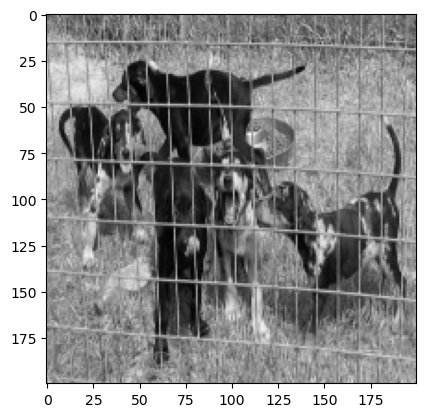

In [135]:
image_no =200
plt.imshow(X_train[image_no], cmap='gray');

#### to do later check image size 

In [28]:
##### Images size in train folder
size = []
for folder in  os.listdir(trainpath) : 
    files = gb.glob(pathname= str( trainpath +'//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

NameError: name 'trainpath' is not defined

<a name="augmentation"></a>
### 2.4 Data Augmentation

#### Why Data Augmentation ?


* Data augmentation is an essential technique in deep learning for images due to : 

    * **Increased Dataset Size:** Deep learning models, especially CNN, often require a large amount of data for effective training. In many cases, obtaining a massive labeled dataset can be challenging. Data augmentation helps artificially increase the size of the training dataset by applying various transformations (rotations, flips, zooms, etc.) to existing images, generating new and diverse examples.
    * **Improved Generalization:** Augmenting the dataset with variations of the original images helps the model generalize better to unseen data. It exposes the model to different perspectives, orientations, and lighting conditions, making it more robust and capable of handling real-world variations.
    * **Reduced Overfitting:** Data augmentation introduces variability during training, preventing the model from memorizing specific details of the training set. This regularization technique reduces overfitting, where the model performs well on the training data but fails to generalize to new, unseen data.

#### How we can make data augmentation in Keras ?

1) Create an instance of the ImageDataGenerator : 

* We can perform data augmentation using the **ImageDataGenerator** class, which is part of the *keras.preprocessing.image* module.
* There are many parameters used to configure the ImageDataGenerator:
    * `rescale` : This parameter scales the pixel values of the images. Setting rescale=1./255 rescales the pixel values to be between 0 and 1.

    * `rotation_range` : It specifies the range (in degrees) for random rotations applied to the images. 
    * `width_shift_range` and `height_shift_range`: These parameters control the range (as a fraction of total width or height) for random horizontal and vertical shifts, respectively.
    * `shear_range` : It determines the shear intensity for random shear transformations.
    * `zoom_range` : Specifies the range for random zoom. A value of 0.2 means the images may be zoomed in or out by up to 20%.

    * `horizontal_flip` : If set to True, it randomly flips images horizontally. 
    * `vertical_flip` : If set to True, it randomly flips images vertically. 
    * `fill_mode` : This parameter determines the strategy for filling in newly created pixels after rotation or shift. 'nearest' fills in new pixels with the nearest existing pixel's value.

2) Create a generator

* Creating a generator using the **ImageDataGenerator** for loading and augmenting images from a specified directory by *flow_from_directory* Or *flow_from_dataframe* :

    * Important parameters to create generator in case of from directory: 

        * `train_data_dir`: This is the path to the directory containing the training images. The generator will load and augment images from this directory.

        * `target_size=(150, 150)`: It specifies the size to which the loaded images will be resized. In this case, images will be resized to a consistent size of 150x150 pixels.

        * `class_mode=binary `: It specifies the type of labels. Since it's set to 'binary', it indicates that the problem is a binary classification task, meaning there are two classes (e.g., positive and negative, cat and dog).
        
        * `class_mode=categorical`: It indicates that the task is a multi-class classification problem. This is because the labels are expected to be in categorical format.
        * `batch_size=32`: This determines the number of images included in each batch during training. A batch is a set of images that the model processes together before updating its weights.

    * Important parameters to create generator in case of from dataframe: 

        * `train_df`: This is the DataFrame containing information about the training images, including columns like 'filename' (image filenames) and 'category' (image categories/labels).
        * `"Cats_Dogs/train/"`: This is the directory path containing the actual training images. The generator will load and augment images from this directory based on the information in the DataFrame.

        * x_col=`filename`: This specifies the column in the DataFrame (train_df) that contains the image filenames.
        * y_col=`category`: This specifies the column in the DataFrame (train_df) that contains the image categories or labels.



  <details>
  <summary><font size="3" color="darkred"><b>Example for creating generator if you access the data in directory</b></font></summary>
  
  ```python
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

# to train the model for your data 
history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
  ```


  <details>
  <summary><font size="3" color="darkred"><b>Example for creating generator if your data in dataframe </b></font></summary>
  
  ```python
    #  A) Training Generator
     train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "Cats_Dogs/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
) 
# B) Validation Generator
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "Cats_Dogs/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

# How to fit the model 
epochs=10 if FAST_RUN else 50
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

  ```

In [27]:
total_train = X_train.shape[0]
total_validate = X_val.shape[0]
batch_size=15

#### A) Training Generator

In [28]:
training_datagen = ImageDataGenerator(
    rotation_range=15,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest' 
    )

train_generator=training_datagen.flow(X_train,y_train, batch_size=batch_size)

#### B) Validation Generator

In [29]:
validation_datagen = ImageDataGenerator()
validation_generator = validation_datagen.flow(X_val,y_val, batch_size=batch_size)


<a name="CNN_model"></a>
## 3- Build CNN model 

<a name="define_model"></a>
### 3.7 Define our CNN model by Keras 

In [30]:
# my CNN arch will be In --> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out
model = tf.keras.models.Sequential()
#start the model with convolutional layer followed by max pooling layer 
model.add(tf.keras.layers.Conv2D(32,kernel_size=(5,5),strides=(1,1),padding="same",activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,1)))
model.add(tf.keras.layers.Conv2D(32,kernel_size=(5,5),strides=(1,1),padding="same",activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))

# another convolutional layer followed by max pooling layer 
model.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),strides=(1,1),padding="same",activation='relu'))
model.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),strides=(1,1),padding="same",activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))

# Flatten the output from feature extractor then build the FC layers to get the desired output 
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation="linear"))

<a name="model_info"></a>
### 3.8 Information about the defined model

####  A) Model Summary

> To display a summary of the architecture of a neural network model; use **summary()** function. 
* In particular, you can retrieve the number of parameters in each layer as well as the total number of trainable parameters to anticipate the computational cost of your model.


In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 150, 150, 32)      832       
                                                                 
 conv2d_9 (Conv2D)           (None, 150, 150, 32)      25632     
                                                                 
 batch_normalization_4 (Batc  (None, 150, 150, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 75, 75, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 75, 75, 64)       

<a name="model_compile"></a>
### 3.9 Compile our Model

In [32]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.legacy.Adam(0.01), metrics=['accuracy'])

> --> Once the model is compiled, it is ready for training -->

<a name="train_evaluate"></a>
## 4- Train & Evaluate the model

* Train the CNN model using the training dataset. 
* Adjust the model's weights iteratively to minimize the defined loss function and enhance its ability to make accurate predictions.
* Evaluate the trained model on a separate validation dataset to assess its generalization performance.


#### How to fit your model when you did data augmentation ? 
We will use the same method **model.fit** but the parameters will be changed, here are some of the important parameters needed : 
* d**atagen.flow(X_train, Y_train, batch_size=batch_size)**: To create a data generator using the ImageDataGenerator (datagen) to generate augmented batches of training data. It takes X_train (input features) and Y_train (labels) as input and yields batches of augmented data during training.
* **epochs** = 20: The number of training epochs. 
* **steps_per_epoch** : is the total number of batches to yield from the generator before declaring one epoch finished. It is usually set to total_samples / batch_size.

* **validation_data** : is an optional generator for validation data.
* **validation_steps** : is the total number of batches to yield from the validation generator before stopping at the end of every epoch.
* **callbacks=[learning_rate_reduction]**: This is an optional parameter, and it specifies any callbacks to be applied during training. In this case, it includes a callback named learning_rate_reduction, which might adjust the learning rate during training.

<a name="train_model"></a>
### 4.1 Train (Fit) our CNN Model

In [33]:
epochs=5

In [34]:

history=model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator, 
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    verbose = 2, 

)

Epoch 1/5


1263/1263 [==============================] - 579s 458ms/step - loss: 5.2157 - accuracy: 0.5293 - val_loss: 0.7041 - val_accuracy: 0.5011
Epoch 2/5
1263/1263 [==============================] - 527s 417ms/step - loss: 0.6991 - accuracy: 0.5172 - val_loss: 0.6951 - val_accuracy: 0.4943
Epoch 3/5
1263/1263 [==============================] - 511s 405ms/step - loss: 0.6950 - accuracy: 0.5032 - val_loss: 0.6950 - val_accuracy: 0.4935
Epoch 4/5
1263/1263 [==============================] - 531s 420ms/step - loss: 0.6941 - accuracy: 0.5021 - val_loss: 0.7017 - val_accuracy: 0.4937
Epoch 5/5
1263/1263 [==============================] - 540s 427ms/step - loss: 0.6942 - accuracy: 0.4940 - val_loss: 0.6936 - val_accuracy: 0.4935


<a name="model_history"></a>
### 4.2 The history of model learning on training data 

#### A) The Loss Vs Epochs during the training 

In [35]:
def plot_loss_tf(history):
    fig,ax = plt.subplots(1,1, figsize = (4,3))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    ax.plot(history.history['loss'], label='loss')
    ax.set_ylim([0, 2])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('loss (cost)')
    ax.legend()
    ax.grid(True)
    plt.show()


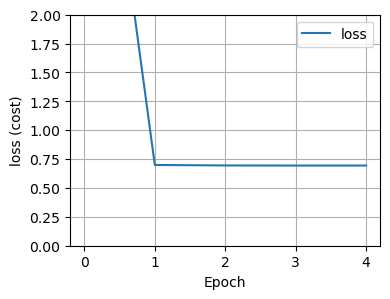

In [36]:
plot_loss_tf(history)

#### B) The Accuracy Vs Epochs during the training 

In [37]:
def plot_accuracy_tf(history):
    fig,ax = plt.subplots(1,1, figsize = (4,3))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    ax.plot(history.history['accuracy'], label='Accuracy')
    ax.set_ylim([0, 2])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.legend()
    ax.grid(True)
    plt.show()

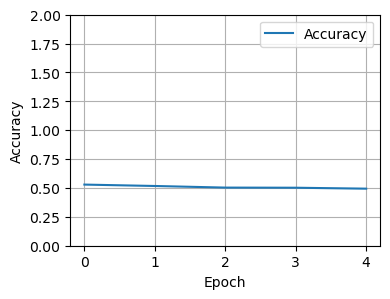

In [38]:
plot_accuracy_tf(history)

#### Important Note: What if you have cross validation data with the training? **Double click **to see what you should do! 

<!--
#To adjust the history for both
# Train the model and obtain the history object
history = model.fit(x_train, y_train, epochs=10, batch_size=1000, validation_data=(x_val, y_val))

# Access training loss values
training_loss = history.history['loss']

# Access validation loss values
validation_loss = history.history['val_loss']

# Access additional metrics if specified, e.g., accuracy
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# To Plot the two figures for both 
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
# ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
# ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
-->



> --> Congratulations!, Once our model has been trained on the data, Now, we can assess its performance on any test data. -->

<a name="evaluate_model"></a>
### 4.3 Evaluate our CNN Model


* Assessing its performance on a separate dataset, typically a validation set or a test set!
* in our example : we use training and test as we don't have cross validation set 
    * The evaluate() function will return a list with two values. 
        * The first will be the loss of the model on the dataset. 
        * The second will be the accuracy of the model on the dataset.
* we will compare the accuracy of our CNN model for the test dataset with the previously built DNN model   

In [39]:
training_loss, training_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_val, y_val, verbose=0)
print('The accuracy of our model on Training dataset : %.2f' % (training_acc*100))
print('The loss of our model on Training dataset : %.2f' % (training_loss*100))
print('The accuracy of our model on Test dataset : %.2f' % (test_acc*100))
print('The loss of our model on Test dataset : %.2f' % (test_loss*100))

The accuracy of our model on Training dataset : 50.10
The loss of our model on Training dataset : 69.33
The accuracy of our model on Test dataset : 49.35
The loss of our model on Test dataset : 69.36


#### Our Observation on the model performance

* Flashback :
    * When we used DNN to build the model for the same dataset, The accuracy for test was : 91 %  
    * The main reason for that; here we are using CNN, which is the better option for images analysis as it has the feature extractor that make the NN able to pick up the details of the images rather than the regular DNN  

> After successfully training and evaluating your model, you can leverage it to make predictions on new data. 

* Optionally,(if you have cross validation dataset)
    * fine-tune the hyperparameters or architecture based on the validation results to improve the model's overall performance.
    * Once satisfied with the model's performance, deploy it for making predictions on new, unseen data.

<a name="prediction"></a>
## 5- Prediction

<a name="make_prediction"></a>
### 5.1 Make Predictions using our trained model

> here, we are using test data as example to predict, as we don't have cross validation and test datasets 

> Executing the prediction function once over the entire dataset will generate predictions that can be accessed from the output array

In [31]:
predictions = model.predict(X_test)

  1/313 [..............................] - ETA: 4s

313/313 [==============================] - 1s 4ms/step


> Let's see some cases and compare! you try any image number here as you want

<a name="correct_incorrect"></a>
### 5.2 Visualize correct and incorrect predictions

* Let's look at instances of both correct and incorrect predictions made by our model.

In [32]:
#get the predictions indices for the test data
predicted_indices = np.argmax(predictions, axis=1)
#get the indices to be plotted
correct = np.nonzero(predicted_indices==y_test)[0]
incorrect = np.nonzero(predicted_indices!=y_test)[0]

TODO Later : Make one function to plot the prediction then if it is correct or not correct dynamically get the values **DoubleClick**

<!-- def plot_prediction(case):
    """ 
    This function to plot random 12 case of the prediction in both cases correct and incorrect
    """
    predictions = model.predict(x_test)
    #get the predictions indices for the test data
    predicted_indices = np.argmax(predictions, axis=1)

    fig, axes = plt.subplots(3, 4, figsize=(12, 8))
    fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92]) 
    for i, ax in enumerate(axes.flat):
        # get random index from the incorrect indexes that already found 
        random_index = case[np.random.randint(len(case))]
        # Display the image after reshape 
        ax.imshow(x_test[random_index].reshape(28, 28), cmap='gray', interpolation='none')
        # Display the label above the image
        ax.set_title("Predicted {}, Real {}".format(predicted_indices[random_index], y_test[random_index]))
        ax.set_axis_off() 
    fig.suptitle("The prediction Vs the real", fontsize=16) 
    plt.show()
# TODO : continue later  -->

#### A) Incorrect cases for our model

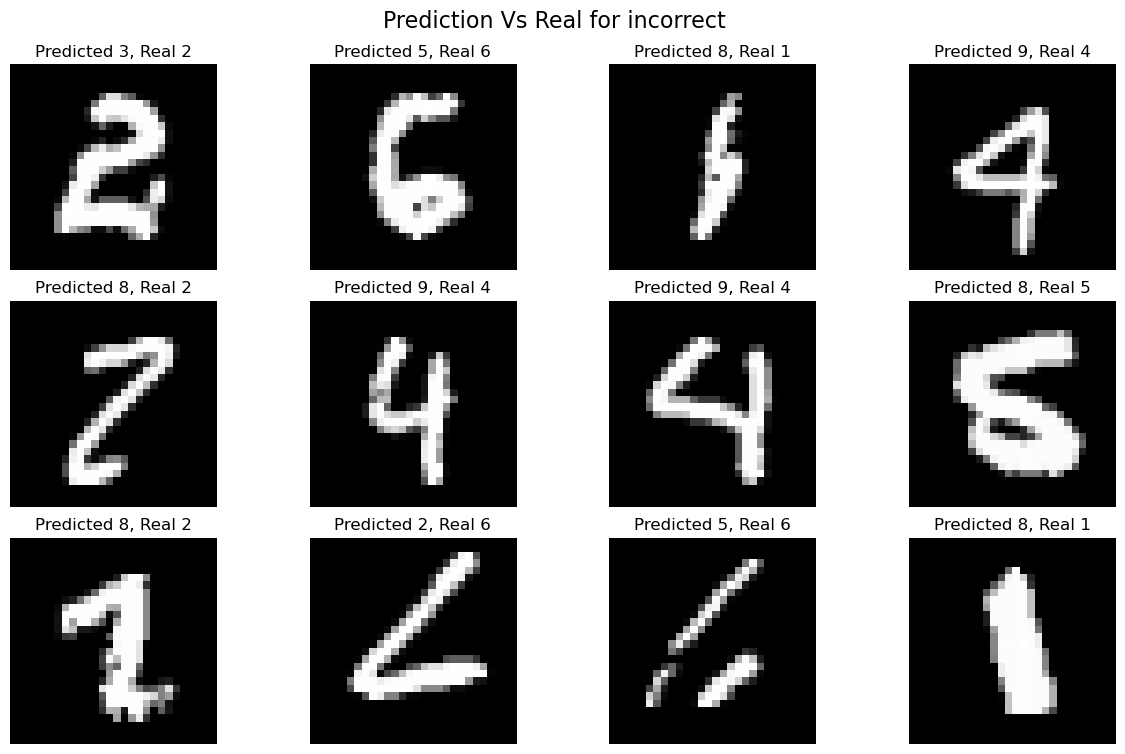

In [34]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92]) 
for i, ax in enumerate(axes.flat):
    # get random index from the incorrect indexes that already found 
    random_index = incorrect[np.random.randint(len(incorrect))]
    # Display the image after reshape 
    ax.imshow(x_test[random_index].reshape(28, 28), cmap='gray', interpolation='none')
    # Display the label above the image
    ax.set_title("Predicted {}, Real {}".format(predicted_indices[random_index], y_test[random_index]))
    ax.set_axis_off() 
fig.suptitle("Prediction Vs Real for incorrect", fontsize=16) 
plt.show()

#### B) Correct cases for our model

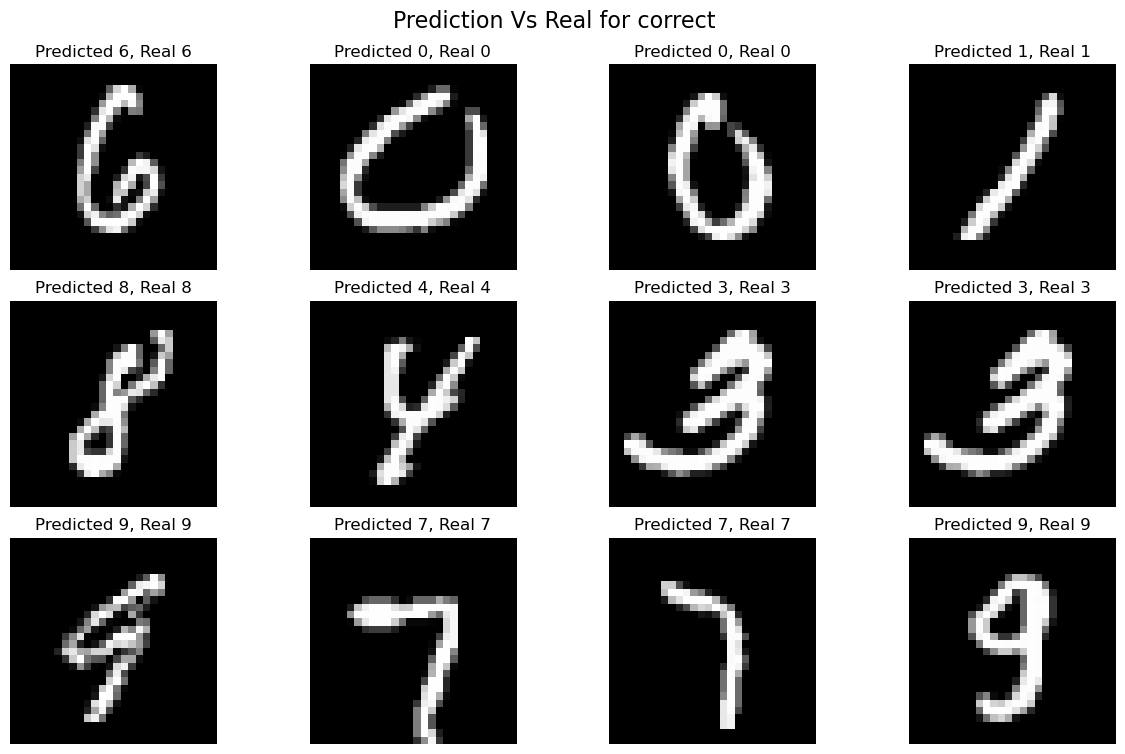

In [35]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92]) 
for i, ax in enumerate(axes.flat):
    # get random index from the incorrect indexes that already found 
    random_index = correct[np.random.randint(len(correct))]
    # Display the image after reshape 
    ax.imshow(x_test[random_index].reshape(28, 28), cmap='gray', interpolation='none')
     # Display the label above the image
    ax.set_title("Predicted {}, Real {}".format(predicted_indices[random_index], y_test[random_index]))
    ax.set_axis_off() 
fig.suptitle("Prediction Vs Real for correct", fontsize=16) 
plt.show()

nbsp;

<a name="other_apps"></a>
## Further TensorFlow (Keras) Applications for CNN 
---------
* [The basic tools of Keras for CNN](https://github.com/momarzouksobeh/MachineLearning_for_DrugDesign_Roadmap/blob/main/1_ML_Toolkit/keras/2_Keras_BasicTools_CNN.ipynb)

* [Example No 1](https://github.com/momarzouksobeh/MachineLearning_for_DrugDesign_Roadmap/blob/main/1_ML_Toolkit/keras/CNN_case_studies/Example_No_1_images_6categories.ipynb) : 6 Categories Images Classification.

* [Example No 2](https://github.com/momarzouksobeh/MachineLearning_for_DrugDesign_Roadmap/blob/main/1_ML_Toolkit/keras/CNN_case_studies/Example_No_2_mnist_dataset_acc99.ipynb) : MNIST dataset (Acc 0.997).

* [Example No 3](https://github.com/momarzouksobeh/MachineLearning_for_DrugDesign_Roadmap/blob/main/1_ML_Toolkit/keras/CNN_case_studies/Example_No_3_fashion_related_dataset.ipynb) : fashion-related dataset. 

* [Example No 4](https://github.com/momarzouksobeh/MachineLearning_for_DrugDesign_Roadmap/blob/main/1_ML_Toolkit/keras/CNN_case_studies/Example_No_4_cats_dogs_classification.ipynb) : Cats & Dogs Classification. 



&nbsp;
<a name="resources"></a>
## Key Resources Utilized in Crafting This Notebook :
--------------------------
- <a rel="keras_website" href="https://keras.io"> Keras Official Website. </a>
- <a rel="the code used" href="https://www.youtube.com/watch?v=ohyn_MzS_hE&list=PL6-3IRz2XF5VbuU2T0gS_mFhCpKmLxvCP"> Playlist for Keras in Arabic by Hesham Asem. </a>


